In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
cols =  "fLength",  "fWidth", "fSize", "fConc", " fConc1", "fAsym", "fM3Long", " fM3Trans", "fAlpha", "fDist", "class"         
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [25]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [26]:
df["class"] = (df["class"] == "g").astype(int)

<h2>Classification</h2>

In [27]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


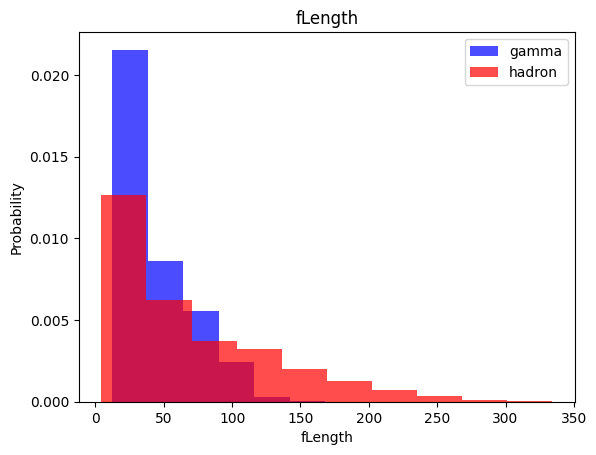

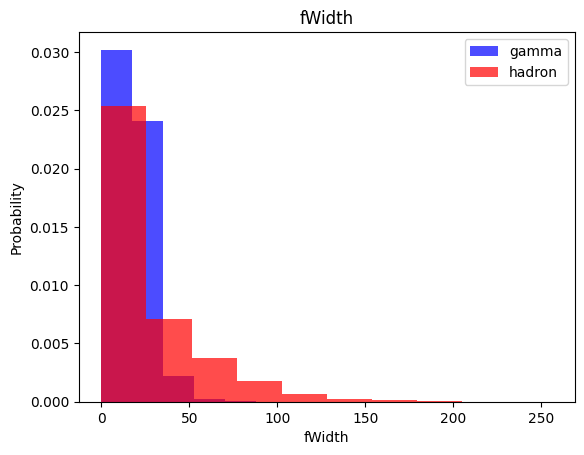

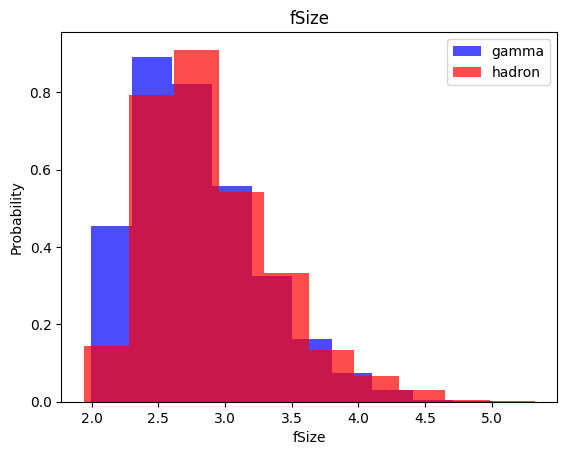

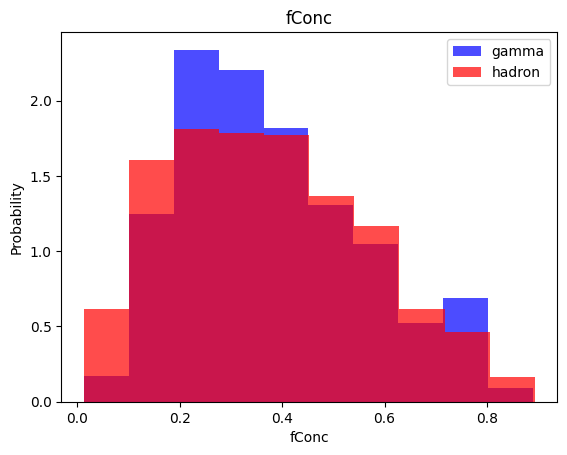

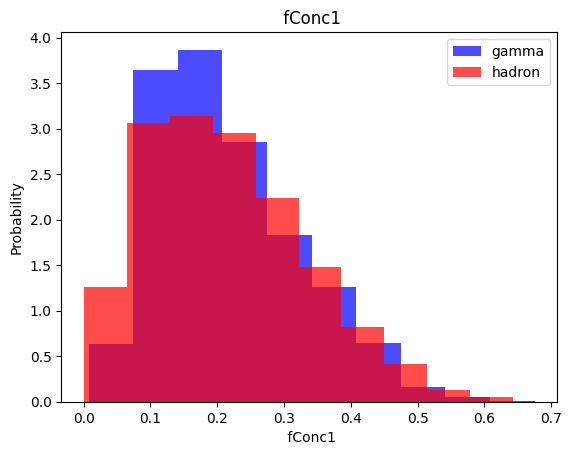

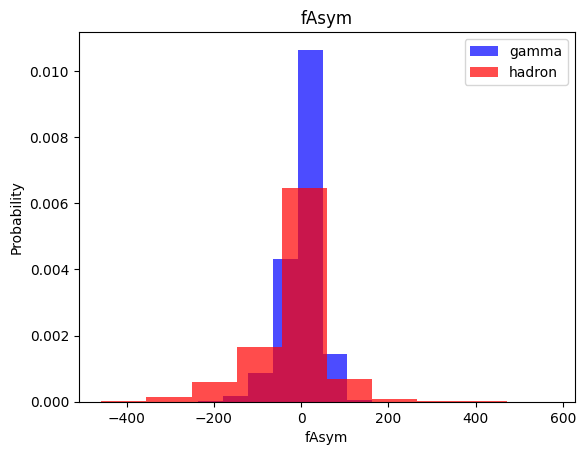

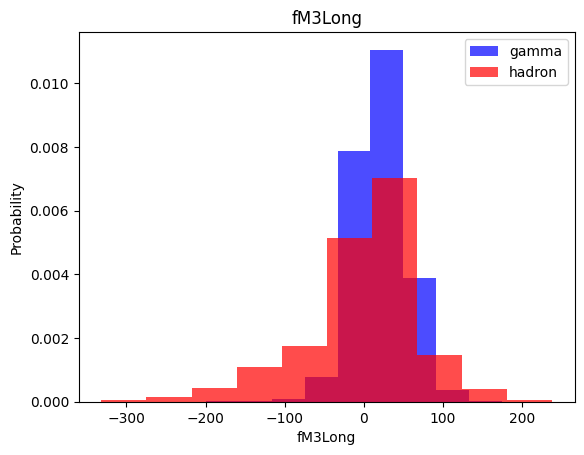

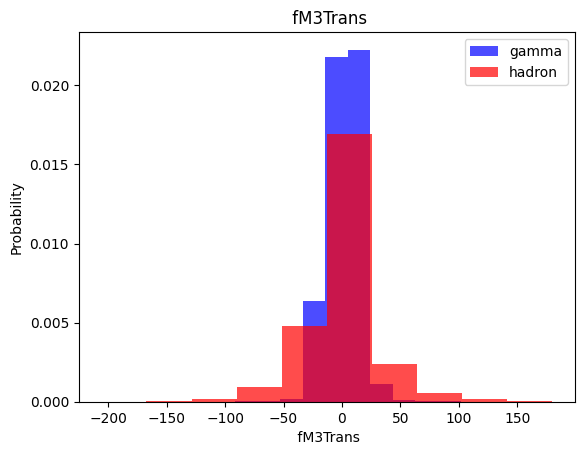

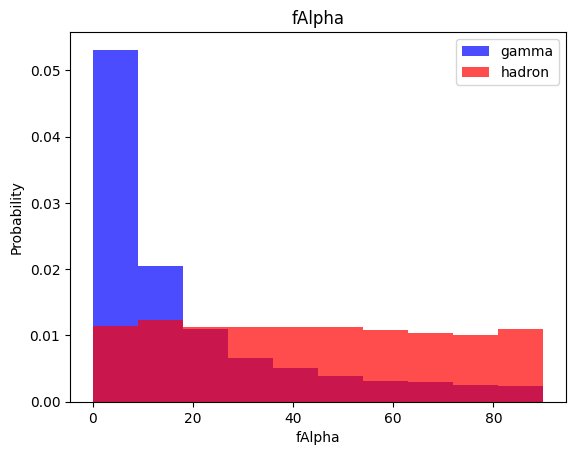

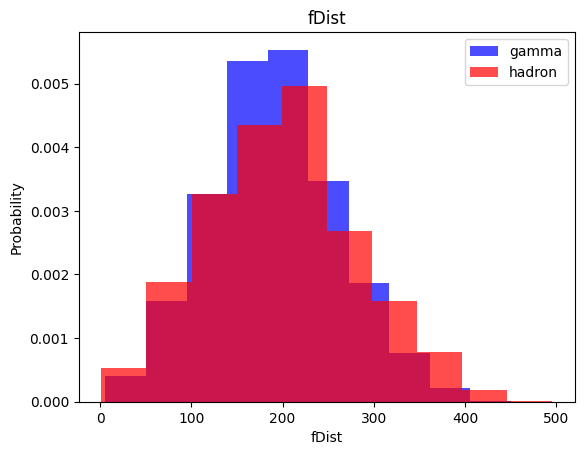

In [28]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color = "blue", label = "gamma", alpha = 0.7, density= True)
    plt.hist(df[df["class"]==0][label], color = "red", label = "hadron", alpha = 0.7, density= True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

<h2>Train,Validation,Test Datasets</h2>

In [42]:
train , valid , test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
def scale_dataset(dataframe, oversample= False):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X , Y)

    data = np.hstack((X , np.reshape(Y, (-1, 1))))

    return data, X , Y

In [33]:
# In simple words:
# The first line prints how many samples are labeled class 1 (gamma).
# The second line prints how many samples are labeled class 0.

print(len(train[train["class"]== 1]))
print(len(train[train["class"]== 0]))

7430
3982


In [34]:
train, X_train, Y_train = scale_dataset(train, oversample = True)

In [35]:
len(Y_train)

14860

In [36]:
sum(Y_train == 1)

7430

In [37]:
sum(Y_train == 0)

7430

In [43]:
train, X_train, Y_train = scale_dataset(train, oversample = True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample = False)
test, X_test, Y_test = scale_dataset(test, oversample = False)

<h2>KNN</h2>

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [45]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
Y_pred = knn_model.predict(X_test)

In [47]:
Y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [48]:
Y_test

array([1, 1, 1, ..., 1, 0, 0])

In [49]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1330
           1       0.83      0.88      0.86      2474

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



<h2>Naive Bayes</h2>

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [52]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50      1330
           1       0.74      0.88      0.80      2474

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



In [53]:
Y_train

array([0, 1, 1, ..., 0, 0, 0])

In [54]:
X_test

array([[ 0.84847578,  0.57144437,  1.76522885, ...,  0.46905411,
        -1.03825939,  2.3149935 ],
       [ 0.17703526,  0.01801324,  0.49640884, ...,  0.94980852,
        -0.76431226,  1.9424482 ],
       [-0.32870032, -0.34305281, -0.55210775, ...,  0.50828042,
        -0.95182826,  0.12969433],
       ...,
       [-0.81399429, -0.54929016, -0.91374593, ...,  0.44314985,
        -0.08446074, -1.12784591],
       [ 2.20828143,  1.09106012,  0.45170959, ..., -1.1271695 ,
        -0.78516373,  1.93992111],
       [ 0.42244093,  1.45429354,  0.45788234, ...,  2.37025358,
         1.58859921,  0.29576113]])

<h2>Logistic Regression</h2>

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [57]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1330
           1       0.84      0.81      0.82      2474

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



<h2>Support Vector Machines</h2>

In [58]:
from sklearn.svm import SVC

In [59]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [60]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1330
           1       0.89      0.89      0.89      2474

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



<h2>Neural Networks</h2>

In [61]:
import tensorflow as tf

In [76]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history["loss"], label= "loss")
    ax1.plot(history.history["val_loss"], label= "val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)

    ax2.plot(history.history["accuracy"], label= "accuracy")
    ax2.plot(history.history["val_accuracy"], label= "val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    
    plt.show()

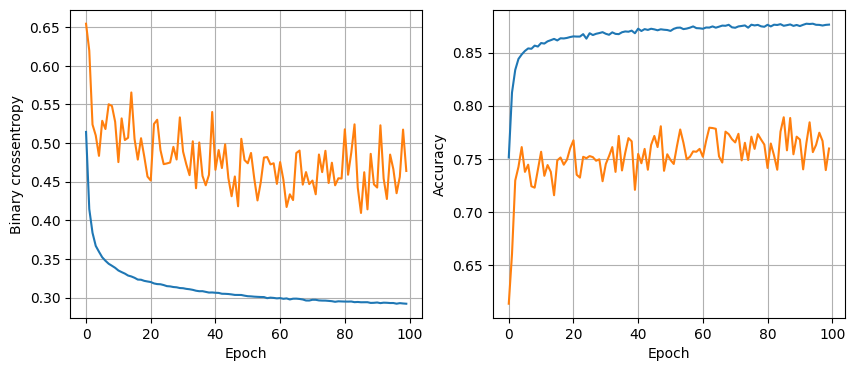

In [77]:
plot_history(history) 

In [81]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),  # safer and warning-free
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),  # use passed lr
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    history = nn_model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    return nn_model, history

In [ ]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [1.0, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size} ")
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss, _ = model.evaluate(X_valid, Y_valid, verbose=0)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [ ]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1 ,1)

In [ ]:
print(classification_report(Y_test, Y_pred))